# NBA Shots Taken 2014-15

#### Import Python Packages

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
sns.set(color_codes=True)

In [2]:
from src.shot_functions import *

## Exploratory Data Analysis

#### Basic Data Information

In [3]:
df = pd.read_csv('data/clean_shots_data.csv')

In [4]:
df.columns

Index(['GAME_ID', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK',
       'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'PTS_TYPE',
       'SHOT_RESULT', 'FGM', 'PTS', 'player_name'],
      dtype='object')

In [5]:
df.describe()

,GAME_ID,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,PTS_TYPE,FGM,PTS
count,1.179360e+05,117936.000000,117936.000000,117936.000000,117936.000000,117936.000000,117936.000000,117936.000000,117936.000000,117936.000000,117936.000000,117936.000000
mean,2.140045e+07,6.476360,2.469941,1412.762125,12.327384,2.056047,2.837739,13.505609,4.124675,2.257920,0.457129,1.007368
std,2.577709e+02,4.688038,1.138098,838.330181,5.666529,3.449101,2.944934,8.733111,2.724360,0.437491,0.498161,1.131055
min,2.140000e+07,1.000000,1.000000,3.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.140023e+07,3.000000,1.000000,668.000000,8.100000,0.000000,0.900000,4.800000,2.300000,2.000000,0.000000,0.000000
50%,2.140045e+07,5.000000,2.000000,1403.000000,12.200000,1.000000,1.700000,13.500000,3.700000,2.000000,0.000000,0.000000
75%,2.140067e+07,9.000000,3.000000,2110.000000,16.400000,3.000000,3.800000,22.500000,5.300000,3.000000,1.000000,2.000000
max,2.140091e+07,37.000000,7.000000,3763.000000,24.000000,32.000000,24.900000,42.800000,53.200000,3.000000,1.000000,3.000000


#### Deeper Dive into the Data

In [6]:
total_count = 117936
made_shot_count = df.FGM[df.FGM==1].count()
miss_shot_count = df.FGM[df.FGM==0].count()
twopt_shot_count = df.PTS_TYPE[df.PTS_TYPE==2].count()
threept_shot_count = df.PTS_TYPE[df.PTS_TYPE==3].count()

In [7]:
# Percentage of 2 point shots taken
twopt_shot_count/total_count

0.7420804504137838

In [8]:
# Percentage of 3 point shots taken
threept_shot_count/total_count

0.25791954958621627

In [9]:
# Percentage of made shots
made_shot_count/total_count

0.4571292904626238

In [10]:
# Percentage of missed shots
miss_shot_count/total_count

0.5428707095373762

In [33]:
two = df[(df.PTS_TYPE == 2)]
three = df[(df.PTS_TYPE == 3)]

misstwo = two[(two.FGM == 0)]
madetwo = two[(two.FGM == 1)]

missthree = three[(three.FGM == 0)]
madethree = three[(three.FGM == 1)]

miss = df[(df.FGM == 0)]
made = df[(df.FGM == 1)]

In [12]:
twopt_made_count = made.PTS_TYPE[made.PTS_TYPE==2].count()
threept_made_count = made.PTS_TYPE[made.PTS_TYPE==3].count()

In [13]:
# Percentage of 2 point shots made
twopt_made_count/twopt_shot_count

0.4905390891016705

In [32]:
# Pecentage of 3 point shots made
threept_made_count/threept_shot_count

0.36100335327766453

In [53]:
madethree.SHOT_DIST.count()

10981

In [54]:
missthree.SHOT_DIST.count()

19437

### Graphs

''

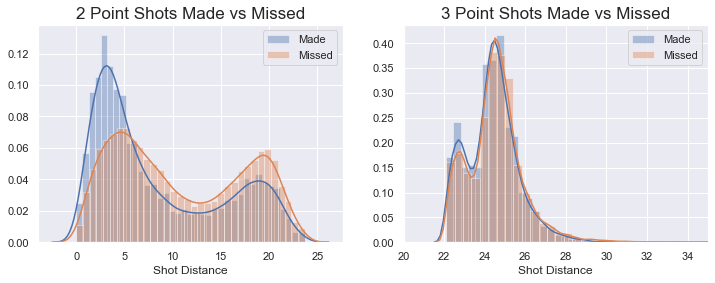

In [58]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs.flatten()

(sns.distplot(madetwo.SHOT_DIST, ax=axs[0], label='Made')
    .set_title("2 Point Shots Made vs Missed",fontsize=17))
(sns.distplot(misstwo.SHOT_DIST, ax=axs[0], label='Missed')
    .set_xlabel('Shot Distance'))

(sns.distplot(madethree.SHOT_DIST, ax=axs[1], label='Made')
    .set_title("3 Point Shots Made vs Missed",fontsize=17))
(sns.distplot(missthree.SHOT_DIST, ax=axs[1], label='Missed')
    .set_xlabel('Shot Distance'))

axs[1].set_xlim(20,35)

axs[0].legend()
axs[1].legend()
;

''

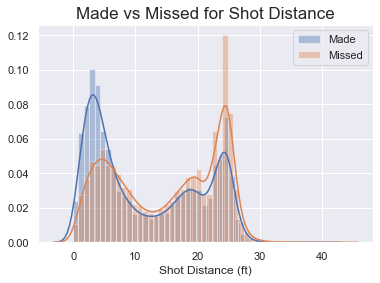

In [16]:
fig, ax = plt.subplots()
(sns.distplot(made.SHOT_DIST, ax=ax, label='Made')
    .set_title("Made vs Missed for Shot Distance",fontsize=17))
(sns.distplot(miss.SHOT_DIST, ax=ax, label='Missed')
    .set_xlabel('Shot Distance (ft)'))
ax.legend()
;

''

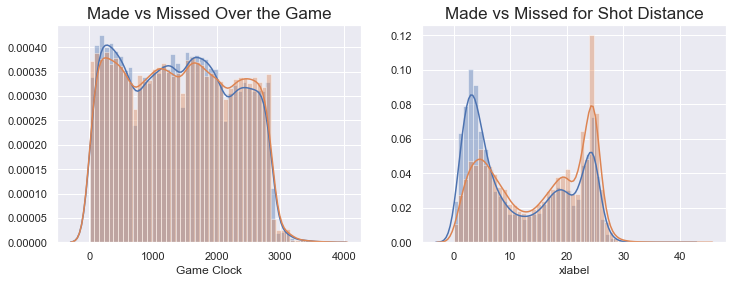

In [17]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs.flatten()

(sns.distplot(made.GAME_CLOCK, ax=axs[0], label='Made')
    .set_title("Made vs Missed Over the Game",fontsize=17))
(sns.distplot(miss.GAME_CLOCK, ax=axs[0], label='Missed')
    .set_xlabel('Game Clock'))

(sns.distplot(made.SHOT_DIST, ax=axs[1], label='Made')
    .set_title("Made vs Missed for Shot Distance",fontsize=17))
(sns.distplot(miss.SHOT_DIST, ax=axs[1], label='Missed')
    .set_xlabel('xlabel'))

ax.legend()
;

In [18]:
df2 = df[['SHOT_NUMBER', 'GAME_CLOCK','SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
          'SHOT_DIST', 'CLOSE_DEF_DIST', 'FGM']]


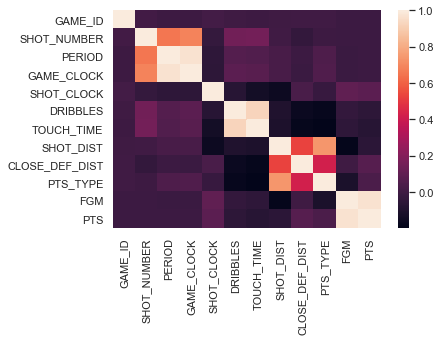

In [19]:
sns.heatmap(df.corr());

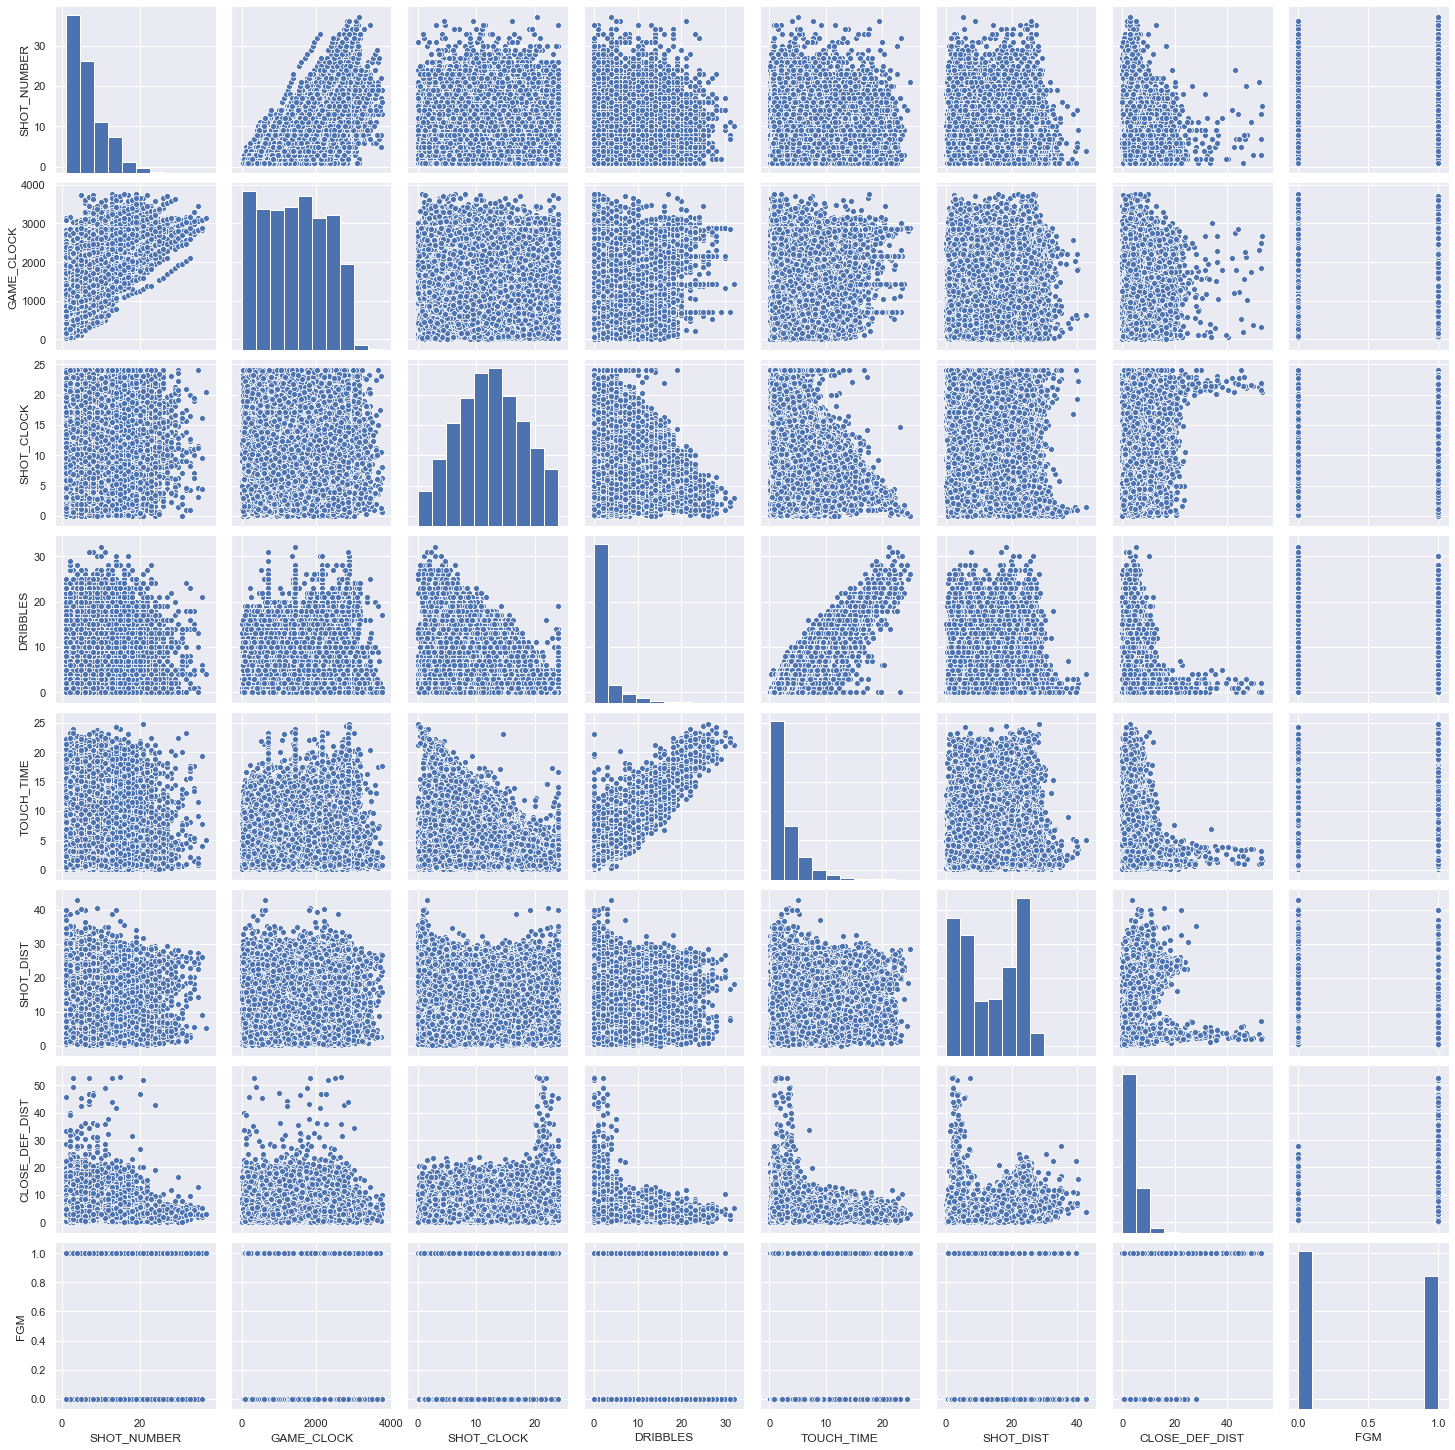

In [20]:
sns.pairplot(df2)

### EDA By Spark SQL

#### Import Spark Packages

In [21]:
import json             # for parsing json formatted data
import csv              # for the split_csvstring function from Part 3.2.2
try:                    # Python 3 compatibility
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import os               # for accessing env variables for AWS credentials


In [22]:
import pyspark as ps

In [23]:
spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('lecture')
         .getOrCreate()
        )
sc = spark.sparkContext

#### Shots Spark Dataframe

In [24]:
# read csv file into DataFrame
sdf = spark.read.csv('data/clean_shots_data.csv',
                      header=True,       # use headers or not
                      quote='"',         # char for quotes
                      sep=",",           # char for separation
                      inferSchema=True)

In [25]:
sdf.printSchema()

root
 |-- GAME_ID: integer (nullable = true)
 |-- SHOT_NUMBER: integer (nullable = true)
 |-- PERIOD: integer (nullable = true)
 |-- GAME_CLOCK: integer (nullable = true)
 |-- SHOT_CLOCK: double (nullable = true)
 |-- DRIBBLES: integer (nullable = true)
 |-- TOUCH_TIME: double (nullable = true)
 |-- SHOT_DIST: double (nullable = true)
 |-- CLOSE_DEF_DIST: double (nullable = true)
 |-- PTS_TYPE: integer (nullable = true)
 |-- SHOT_RESULT: string (nullable = true)
 |-- FGM: integer (nullable = true)
 |-- PTS: integer (nullable = true)
 |-- player_name: string (nullable = true)



In [26]:
sdf.createOrReplaceTempView('shots')

In [27]:
# Number of games
query = '''SELECT COUNT(DISTINCT GAME_ID)
           FROM shots
        '''

spark.sql(query).show()

+-----------------------+
|count(DISTINCT GAME_ID)|
+-----------------------+
|                    896|
+-----------------------+



In [39]:
# Number of players
query1 = '''SELECT COUNT(DISTINCT player_name)
            FROM shots
         '''

spark.sql(query1).show(5)

+---------------------------+
|count(DISTINCT player_name)|
+---------------------------+
|                        281|
+---------------------------+



In [47]:
# Player with the most shots
query1 = '''SELECT player_name, COUNT(player_name)
            FROM shots
            GROUP BY player_name
            ORDER BY COUNT(player_name) DESC
         '''

spark.sql(query1).show(5)

+-----------------+------------------+
|      player_name|count(player_name)|
+-----------------+------------------+
|     james harden|               991|
|       mnta ellis|               986|
|lamarcus aldridge|               969|
|    klay thompson|               933|
|     lebron james|               923|
+-----------------+------------------+
only showing top 5 rows



In [48]:
# Player with the most made shots
query1 = '''SELECT player_name, COUNT(player_name)
            FROM shots
            WHERE FGM=1
            GROUP BY player_name
            ORDER BY COUNT(player_name) DESC
         '''

spark.sql(query1).show(5)

+--------------+------------------+
|   player_name|count(player_name)|
+--------------+------------------+
|  lebron james|               455|
| stephen curry|               455|
|nikola vucevic|               453|
|    mnta ellis|               448|
|  james harden|               445|
+--------------+------------------+
only showing top 5 rows

